# Image Manipulations and Image Spaces

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
import os

In [63]:
# Read an image
original_image = Image.open("./test/100007.jpg")

# Show the image
original_image.show()

In [64]:
# Transform the image to numpy array to manipulate it
image_array = np.array(original_image)

# Inspect the image array
print(f"Shape: {image_array.shape}")
print(f"Red channel:\n{image_array[:, :, 0]}")
print(f"Green channel:\n{image_array[:, :, 1]}")
print(f"Blue channel:\n{image_array[:, :, 2]}")

Shape: (321, 481, 3)
Red channel:
[[ 55  56  57 ...  27  22  25]
 [ 51  53  55 ...  27  23  23]
 [ 53  56  60 ...  33  21  23]
 ...
 [153 152 149 ...  51  47  44]
 [186 192 190 ...  52  47  43]
 [171 170 165 ...  53  47  41]]
Green channel:
[[ 73  74  75 ...  37  32  31]
 [ 69  71  73 ...  38  32  32]
 [ 71  74  78 ...  48  33  32]
 ...
 [147 146 143 ...  52  50  47]
 [180 186 184 ...  53  48  46]
 [164 164 158 ...  53  49  44]]
Blue channel:
[[ 73  74  75 ...  29  24  27]
 [ 69  71  73 ...  32  27  27]
 [ 73  76  80 ...  45  31  29]
 ...
 [151 148 147 ...  46  41  40]
 [184 188 188 ...  45  40  39]
 [171 168 165 ...  45  38  35]]


In [65]:
# Manipulation example: make the image darker
image_array_v1 = (image_array * 0.6).astype(np.uint8)
image_v1_darker = Image.fromarray(image_array_v1)
image_v1_darker.show()

In [66]:
# Manipulation example: manipulate the red channel
image_array_v2 = image_array[:, :, 0]
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()
# Why is it grey?


In [67]:

image_array_v2 = image_array.copy()
image_array_v2[:, :, 1] = 0  # Set green channel to 0
image_array_v2[:, :, 2] = 0  # Set blue channel to 0
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()

In [68]:
# Transform RGB array to Lab array
from skimage.color import rgb2lab, lab2rgb

image_array_lab = rgb2lab(image_array)
# Inspect the image array
print(f"Shape: {image_array_lab.shape}")
print(f"L channel:\n{image_array_lab[:, :, 0]}")
print(f"a channel:\n{image_array_lab[:, :, 1]}")
print(f"b channel:\n{image_array_lab[:, :, 2]}")

# Transform Lab array to RGB array
image_array_rgb = lab2rgb(image_array_lab)

# Inspect the image array
print(f"Shape: {image_array_rgb.shape}")
print(f"Red channel:\n{image_array_rgb[:, :, 0]}")
print(f"Green channel:\n{image_array_rgb[:, :, 1]}")
print(f"Blue channel:\n{image_array_rgb[:, :, 2]}")

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
L channel:
[[29.5586996  29.99167054 30.42367599 ... 13.50060451 11.06059437
  11.03387094]
 [27.81691004 28.68981165 29.5586996  ... 13.96354868 11.2354406
  11.2354406 ]
 [28.75769227 30.05891723 31.78046831 ... 18.48178462 11.59361739
  11.30241975]
 ...
 [61.54556334 61.10806025 60.01608738 ... 21.42062442 20.22577176
  18.89299627]
 [73.89616847 76.04183982 75.36361786 ... 21.82019967 19.52158372
  18.42680655]
 [68.13048212 67.96476658 65.88065315 ... 21.9175385  19.80572915
  17.43291089]]
a channel:
[[-7.04607063 -7.03540805 -7.02479132 ... -6.51191016 -6.63538726
  -3.81737477]
 [-7.08913302 -7.06752453 -7.04607063 ... -6.42130735 -5.41687343
  -5.41687343]
 [-6.53321146 -6.50802069 -6.4744622  ... -7.05470126 -5.82829524
  -4.87507952]
 ...
 [ 2.95842392  2.58009421  2.97329302 ... -1.78067108 -3.33866999
  -2.94003879]
 [ 2.85039568  2.46658441  2.83880087 ... -2.19457511 -2.22117176
  -2.9490557 ]
 [ 3.82416225  2.89979345  3.85029823 ... -1.73703869 -3

In [69]:
# Transform RGB to HSV
from skimage.color import rgb2hsv, hsv2rgb

image_array_hsv = rgb2hsv(image_array)
# Inspect the image array
print(f"Shape: {image_array_hsv.shape}")
print(f"H channel:\n{image_array_hsv[:, :, 0]}")
print(f"S channel:\n{image_array_hsv[:, :, 1]}")
print(f"V channel:\n{image_array_hsv[:, :, 2]}")

# Histogram equalization on the V channel
from skimage.exposure import equalize_hist

image_array_hsv[:, :, 2] = equalize_hist(image_array_hsv[:, :, 2])
print(f"V channel after equalization:\n{image_array_hsv[:, :, 2]}")

# Transform HSV to RGB
image_array_rgb = hsv2rgb(image_array_hsv)

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
H channel:
[[0.5        0.5        0.5        ... 0.36666667 0.36666667 0.38888889]
 [0.5        0.5        0.5        ... 0.40909091 0.40740741 0.40740741]
 [0.51666667 0.51666667 0.51666667 ... 0.46666667 0.47222222 0.44444444]
 ...
 [0.88888889 0.94444444 0.88888889 ... 0.19444444 0.22222222 0.23809524]
 [0.88888889 0.94444444 0.88888889 ... 0.1875     0.1875     0.23809524]
 [0.83333333 0.88888889 0.83333333 ... 0.16666667 0.1969697  0.22222222]]
S channel:
[[0.24657534 0.24324324 0.24       ... 0.27027027 0.3125     0.19354839]
 [0.26086957 0.25352113 0.24657534 ... 0.28947368 0.28125    0.28125   ]
 [0.2739726  0.26315789 0.25       ... 0.3125     0.36363636 0.28125   ]
 ...
 [0.03921569 0.03947368 0.04026846 ... 0.11538462 0.18       0.14893617]
 [0.03225806 0.03125    0.03157895 ... 0.1509434  0.16666667 0.15217391]
 [0.04093567 0.03529412 0.04242424 ... 0.1509434  0.2244898  0.20454545]]
V channel:
[[0.28627451 0.29019608 0.29411765 ... 0.14509804 0.125490

# Compute Power

In [70]:
def compute_power(image):
    img = image.astype(np.float64)
    gamma = 0.7755
    w0 = 1.48169521e-6
    w_r = 2.13636845e-7
    w_g = 1.77746705e-7
    w_b = 2.14348309e-7
    
    r_pow = w_r * np.power(img[:, :, 0], gamma)
    g_pow = w_g * np.power(img[:, :, 1], gamma)
    b_pow = w_b * np.power(img[:, :, 2], gamma)
    
    return w0 + np.sum(r_pow + g_pow + b_pow)

# Compute Distortion

In [71]:
def compute_distortion(original_img,modified_img):
    if original_img.shape != modified_img.shape:
        original_img = original_img[:,:,:3]
        modified_img = modified_img[:,:,:3]

    lab_orig = color.rgb2lab(original_img)
    lab_mod = color.rgb2lab(modified_img)
    
    diff = lab_orig - lab_mod
    dist_pixel = np.sqrt(np.sum(np.square(diff), axis=2))
    total_error = np.sum(dist_pixel)
    
    h, w, _ = original_img.shape
    max_dist = np.sqrt(100**2 + 255**2 + 255**2)
    
    return (total_error / (h * w * max_dist)) * 100


In [72]:


power_result_original=compute_power(np.array(original_image))
power_result_v1=compute_power(np.array(image_v1_darker))
distortion_result=compute_distortion(np.array(original_image),np.array(image_v1_darker))

print(power_result_original)
print(power_result_v1)
print(distortion_result)

5.016254929773464
3.365048261740193
7.0656018008162595


# DVS

In [73]:
def compute_pixel_current():
    raise NotImplementedError

In [74]:
def compute_panel_power():
    raise NotImplementedError

In [75]:
from typing import Tuple

def displayed_image(
        i_cell: np.ndarray,
        vdd: float,
        p1: float = 4.251e-5,
        p2: float = -3.029e-4,
        p3: float = 3.024e-5,
        orig_vdd: float = 15,
        ) -> Tuple[np.ndarray, np.ndarray]:
    """
    Display an image on the OLED display taking into account the effect of DVS.

    :param i_cell: An array of the currents drawn by each pixel of the display.
    :param vdd: The new voltage of the display.
    """
    i_cell_max = (p1 * vdd * 1) + (p2 * 1) + p3
    image_rgb_max = (i_cell_max - p3) / (p1 * orig_vdd + p2) * 255
    out = np.round((i_cell - p3) / (p1 * orig_vdd + p2) * 255)
    original_image = out.copy()

    # Clip the values exceeding `i_cell_max` to `image_rgb_max`
    out[i_cell > i_cell_max] = image_rgb_max

    return original_image.astype(np.uint8), out.astype(np.uint8)

In [76]:
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('sample_cell_current.mat')["I_cell_sample"]

# Inspect the loaded data
print(f"Shape: {mat_data.shape}")
print(f"Red channel:\n{mat_data[:, :, 0]}")
print(f"Green channel:\n{mat_data[:, :, 1]}")
print(f"Blue channel:\n{mat_data[:, :, 2]}")

image_array_orig, image_array_w_dvs = displayed_image(mat_data, 10)
image_orig = Image.fromarray(image_array_orig)
image_orig.show()
image_w_dvs = Image.fromarray(image_array_w_dvs)
image_w_dvs.show()


Shape: (176, 220, 3)
Red channel:
[[2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 [2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 [2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 ...
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.21669412e-04 3.21669412e-04]
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.32171373e-04 3.21669412e-04]
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.32171373e-04 3.11167451e-04]]
Green channel:
[[1.41823333e-04 1.20819412e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 [1.36572353e-04 1.26070392e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 [1.31321373e-04 1.20819412e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 ...
 [1.73329216e-04 1.62827255e-04 1.57576275e-04 ..

In [77]:
def estimate_power_part1(img):
    return compute_power(img) 

In [ ]:
def apply_hungry_blue(img, k):
    img_mod = img.astype(np.int16) #default uint8[0,255] underflow
    img_mod[:, :, 2] = img_mod[:, :, 2] - k
    img_mod = np.clip(img_mod, 0, 255) 
    return img_mod.astype(np.uint8)

In [79]:
def load_images_from_folder(folder_path, limit=50):
    images_list = []
    
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    
    try:
        filenames = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"错误: 找不到文件夹 '{folder_path}'")
        return []

    filenames.sort()

    count = 0
    print(f"正在从 {folder_path} 加载图片...")

    for filename in filenames:
        if count >= limit:
            break
        
        if filename.lower().endswith(valid_extensions):
            file_path = os.path.join(folder_path, filename)
            
            try:
                with Image.open(file_path) as img:
                    img_rgb = img.convert('RGB')
                    
                    img_array = np.array(img_rgb)
                    
                    images_list.append(img_array)
                    count += 1
                    
            except Exception as e:
                print(f"无法加载图片 {filename}: {e}")

    print(f"成功加载 {len(images_list)} 张图片。")
    return images_list

In [80]:
my_folder_path="/home/yuqi/torin/sec-year/energy/EMIOT_Labs/EMIOT_Labs/lab2/BSR_bsds500/BSR/BSDS500/data/images/test"
images = load_images_from_folder(my_folder_path, limit=50)

正在从 /home/yuqi/torin/sec-year/energy/EMIOT_Labs/EMIOT_Labs/lab2/BSR_bsds500/BSR/BSDS500/data/images/test 加载图片...


成功加载 50 张图片。


In [91]:
results_hungry_blue = [] 
k_values = range(0, 256, 5) # - 0, 20, 40...

print("正在运行 Strategy 1: Hungry Blue...")
for k in k_values:
    tot_dist, tot_save = 0, 0
    for img in images:
            p_orig = estimate_power_part1(img)
            img_new = apply_hungry_blue(img, k)
            p_new = estimate_power_part1(img_new)
            
            saving = (p_orig - p_new) / p_orig * 100
            dist = compute_distortion(img, img_new)
            
            tot_dist += dist
            tot_save += saving
        
    results_hungry_blue.append((tot_dist / len(images), tot_save / len(images)))

正在运行 Strategy 1: Hungry Blue...


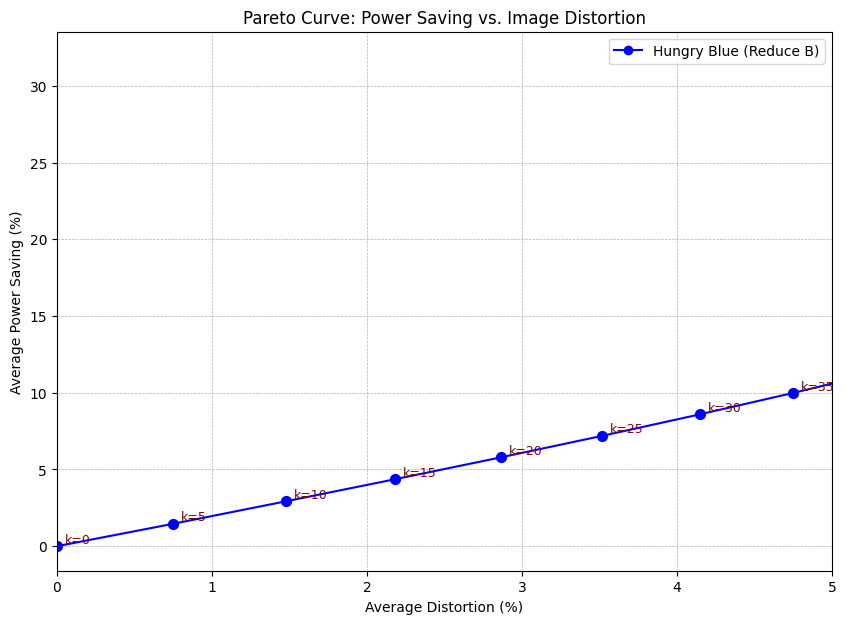

In [92]:
plt.figure(figsize=(10, 7))
x_blue = [r[0] for r in results_hungry_blue]
y_blue = [r[1] for r in results_hungry_blue]
plt.plot(x_blue, y_blue, 'b-o', label='Hungry Blue (Reduce B)')
plt.scatter(x_blue, y_blue, color='blue', s=50)
for x, y, k in zip(x_blue, y_blue, k_values):
    if x < 5: 
        plt.text(x + 0.05, y + 0.2, f'k={k}', fontsize=9, color='darkred')

plt.title('Pareto Curve: Power Saving vs. Image Distortion')
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.xlim(0, 5) 
    
plt.show()


In [93]:
def apply_contrast_brightness(img, scale_v):
    # 转换到 HSV (skimage返回 0-1 float)
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = hsv[:, :, 2] * scale_v # 调整 V 通道
    hsv[:, :, 2] = np.clip(hsv[:, :, 2], 0, 1) # 限制在 0-1
    # 转回 RGB 并扩展到 0-255
    return (color.hsv2rgb(hsv) * 255).astype(np.uint8)

In [104]:
results_contrast = []
c_values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5] 


print("正在运行 Strategy 2: Brightness Scaling...")
for c in c_values:
        tot_dist, tot_save = 0, 0
        for img in images:
            p_orig = estimate_power_part1(img)
            img_new = apply_contrast_brightness(img, c)
            p_new = estimate_power_part1(img_new)
            
            saving = (p_orig - p_new) / p_orig * 100
            dist = compute_distortion(img, img_new)
            
            tot_dist += dist
            tot_save += saving
            
        results_contrast.append((tot_dist / len(images), tot_save / len(images)))

正在运行 Strategy 2: Brightness Scaling...


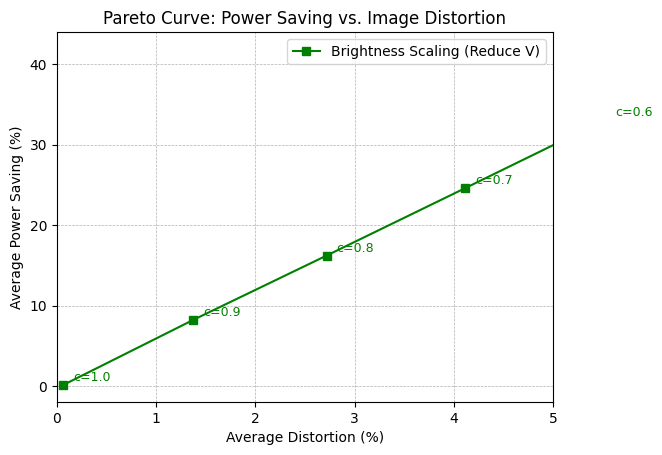

In [106]:
x_cont = [r[0] for r in results_contrast]
y_cont = [r[1] for r in results_contrast]
plt.plot(x_cont, y_cont, 'g-s', label='Brightness Scaling (Reduce V)')
for x, y, c in zip(x_cont, y_cont, c_values):
    if x < 6:
        # y+0.5 让文字稍微还在点上方
        plt.text(x + 0.1, y + 0.5, f'c={c:.1f}', color='green', fontsize=9)
plt.title('Pareto Curve: Power Saving vs. Image Distortion')
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlim(0, 5) 
    
plt.show()

In [ ]:
# --- 策略 C: Histogram Equalization (混合法) ---
    # 直方图均衡化通常只有一个结果。为了画成曲线，我们将它与原图按比例混合。

from skimage import color, exposure
results_hist = []
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   # 手动定义

print("正在运行 Strategy 3: Histogram Equalization...")
for alpha in alphas:
        tot_dist, tot_save = 0, 0
        for img in images:
            p_orig = estimate_power_part1(img)
            
            # 1. 生成全均衡化图像
            hsv = color.rgb2hsv(img)
            hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
            img_eq = (color.hsv2rgb(hsv) * 255).astype(np.uint8)
            
            # 2. 混合: Final = (1-alpha)*Original + alpha*Equalized
            img_mixed = (img * (1 - alpha) + img_eq * alpha).astype(np.uint8)
            
            p_new = estimate_power_part1(img_mixed)
            saving = (p_orig - p_new) / p_orig * 100
            dist = compute_distortion(img, img_mixed)
            
            tot_dist += dist
            tot_save += saving
            
        results_hist.append((tot_dist / len(images), tot_save / len(images)))

正在运行 Strategy 3: Histogram Equalization...


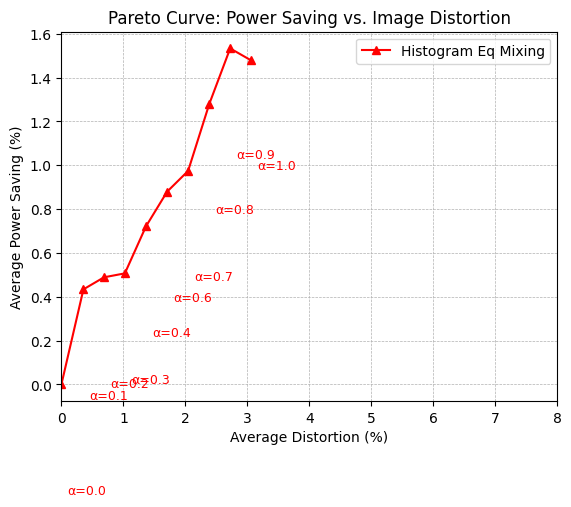

In [103]:
x_hist = [r[0] for r in results_hist]
y_hist = [r[1] for r in results_hist]
plt.plot(x_hist, y_hist, 'r-^', label='Histogram Eq Mixing')
for x, y, a in zip(x_hist, y_hist, alphas):
    if x < 6:
        # 为了不遮挡，HistEq 的文字往左下放一点
        plt.text(x + 0.1, y - 0.5, f'α={a:.1f}', color='red', fontsize=9)
plt.title('Pareto Curve: Power Saving vs. Image Distortion')
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
    
    # 限制X轴范围，以便看清低失真区域 (根据Lab提示，通常关注 <5%)
plt.xlim(0, 8) 
    
plt.show()